<a href="https://colab.research.google.com/github/IgorvH-Developer/ColaboratoryFailes/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

from google.colab import drive


In [141]:
device = torch.device("cuda")

In [142]:
import sklearn.datasets
boston = sklearn.datasets.load_boston()
boston.data.shape

(506, 13)

In [143]:
X_train = torch.tensor(boston.data[0:506])
y_train = torch.tensor(boston.target[0:506])
X_test = torch.tensor(boston.data[460:506])
y_test = torch.tensor(boston.target[460:506])

In [144]:
X_train.requires_grad_()
y_train.requires_grad_()
X_test.requires_grad_()
y_test.requires_grad_()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1);

In [145]:
a= X_train[:,5]
b = X_train[:,12]
c= X_test[:,5]
d = X_test[:,12]
newX_train = torch.ones(a.size(0),2)
newX_test = torch.ones(c.size(0),2)

newX_train[:,0] = a
newX_train[:,1] = b
newX_train.requires_grad_
newX_test[:,0] = c
newX_test[:,1] = d
newX_test.requires_grad_
newX_test.size()

torch.Size([46, 2])

In [146]:
y_test.size()

torch.Size([46, 1])

In [163]:
class GuessPrice(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(GuessPrice, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.ELU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.ELU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ3 = torch.nn.ELU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ4 = torch.nn.ELU()
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc5(x)
        return x

    
bostonPrice_net = GuessPrice(5)

In [173]:
def loss(preds, target):
    square = ((preds - target) ** 2).mean()
    return square

optimizer = torch.optim.Adam (bostonPrice_net.parameters(), 
                             lr=0.0005)
# сначала скорость обучения 0.005 когда дошло до функ.ош. в 12 поставил значение 0.001

In [174]:
batch_size = 506
loss_history = [[0,0] for i in range(50000)]

for epoch in range(50000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = bostonPrice_net.forward(x_batch.float()) 
        
        loss_value = loss(preds, y_batch)
        #print(loss_value)
        loss_value.backward()

        loss_history[epoch][0] = epoch
        loss_history[epoch][1] = loss_value.data.numpy().tolist()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = bostonPrice_net.forward(X_train.float())
        #print(((test_preds - y_train) ** 2).mean())
        print(loss( test_preds ,y_train))

tensor(10.5459, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6829, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6759, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6758, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6757, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6755, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6754, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6752, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6750, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6748, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6745, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6743, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6740, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6737, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6734, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6731, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(7.6727, dtype=to

In [160]:
pr = bostonPrice_net.forward(X_train[100:200].float())
pr.size()

torch.Size([100, 1])

In [157]:
y_train[460:506];

In [161]:
loss(y_train[100:200],pr)
#pr - y_test

tensor(18.2974, dtype=torch.float64, grad_fn=<MeanBackward0>)

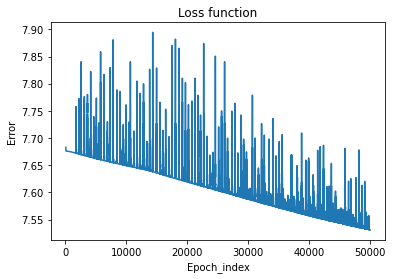

In [175]:
plt.plot([row[0] for row in loss_history][100:], [row[1] for row in loss_history][100:])
plt.title(label='Loss function')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()

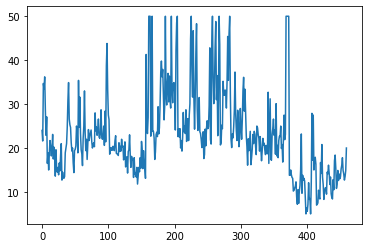

In [ ]:
x = torch.zeros(y_train.size(0),1)
for i in range(y_train.size(0)):
    x[i] = i

plt.plot(x.numpy(), y_train.detach().numpy())

In [ ]:
plt.plot(x.numpy(), X_train[:,12].detach().numpy(),'r')